<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Census" data-toc-modified-id="Census-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Census</a></span></li><li><span><a href="#Sample" data-toc-modified-id="Sample-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sample</a></span></li><li><span><a href="#Central-Limit-Theorem" data-toc-modified-id="Central-Limit-Theorem-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Central Limit Theorem</a></span></li></ul></div>

# Gremio Stadium
<BR CLEAR=”middle” />
<img src="https://besthqwallpapers.com/Uploads/30-12-2018/76317/arena-do-gremio-match-night-gremio-fc-hdr.jpg" width="1000" height="200" align="middle"/><BR CLEAR=”middle” />

Suppose I would like to know the average age of the supporters in the stadium. Considering a full house takes 60540 spectators, how would I go about it?

Essentially there are 3 strategies:
1. Census
2. Sample
3. Samples

> Note: These represents *quantitative* strategies. There are also qualitative strategies. In financial risk models for instance these are quite common and referred to as 'expert opinions' or 'expert models' . In essence, in the best case, a judgement call from a senior based on 3 decades experience. Worst case a guestimate from the junior that happens to work the excel. Mixed models occur too. In practice these approaches are often the best viable  option, and in many cases are sufficient for the purpose.

## Census

Simply asking everyone in the stadium how old they are. There is one **big** advantage to this strategy:  
- Correct answer

Unfortunately there are also some downsides:
- Impractical 
- Expensive
- High, what inside a bank is known as, operational risk: Everything that can go wrong, will: Tally sheets getting lost or illegible, computers breaking down, interviewers needing a break etc. 

There is good reason why a census is not as popular a in 1 BC

However in this case it is good to set up a population for later use.

So lets assume for simplicity sake that the population will be between 20 and 80 years old and that each year is represented equally, i.e. is uniformly distributed. This way we know that the average age will be 50.


Number of spectators: 60540
Average age: 50.08457218368021 years


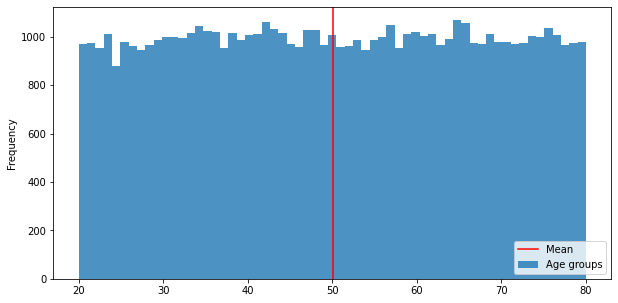

In [224]:
# generate random dice rolls
from numpy.random import seed
from numpy.random import randint
from numpy import mean, std
# seed the random number generator
seed(2019)
# generate a 'population' 
pop = pd.Series(randint(20, 81, 60540))

#Population mean:
print(f'Number of spectators: {len(pop)}')
print(f'Average age: {mean(pop)} years')
pop.plot.hist(bins=61, figsize=(10,5),alpha=0.8, label='Age groups')
# pop.plot(figsize=(10,5));
plt.axvline(mean(pop), c='r', label='Mean')
plt.legend(loc='lower right');


## Sample

My guess is that most probably the most common approach would be to draw a sample, implicitly meaning a *random* sample. I.e. randomly select a number of supporters, ask their age, calculate the average and take that number as the average for the stadium.

The 'Law of big numbers' states that as the size of a sample is increased, the more accurate of an estimate the sample mean will be of the population mean.

Now the question is: How big does this number need to be to be reliably close to the truth?

Luckily there are ways to calculate this and, more conveniently, websites like https://www.surveysystem.com/sscalc.htm . For the Gremio stadium it would be 8289 persons to produce an average plus or minus 1 year from the ground truth, 95 out of 100 samples.

Quite a number. 


In [225]:
# Create list y with the means of samples with samplesiszes starting at 1 up to 20.000

y = [pop.sample(_,random_state=2021).mean() for _ in range(1,20000)]
y_std = [pop.sample(_, random_state=2021).std() for _ in range(1,20000)]

# # print
# for _ in range(1,5000,3):
#     print(f'mean for sample size {_}: {rolls.sample(_).mean()}, std : {y_std[_]}')
#     print(f'mean for sample size {_}: {y[_]}, std : {y_std[_]}')

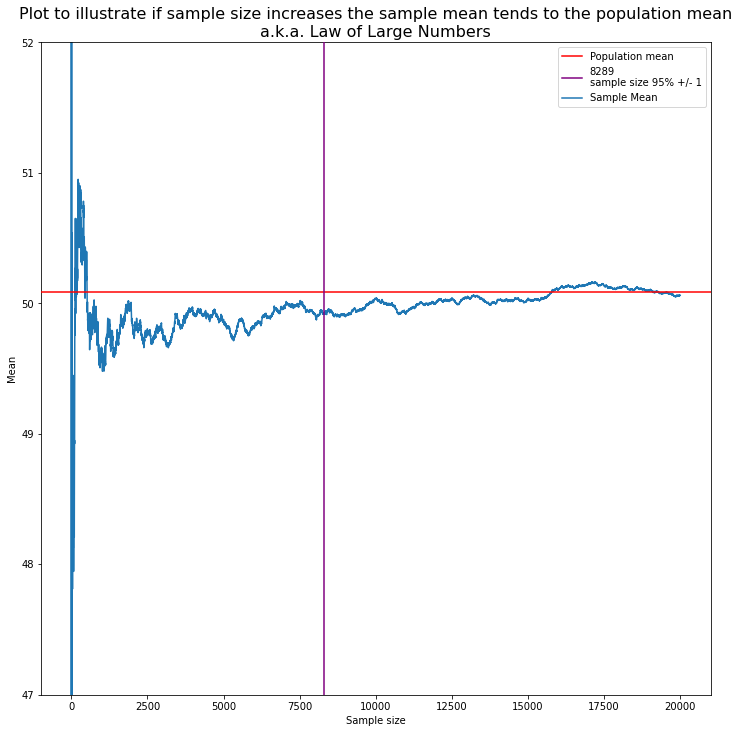

In [231]:
# illustrate in a plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plt.axhline(rolls.mean(), c='r', zorder=10, label = 'Population mean')
plt.axvline(8289, c='purple', zorder=10, label = f'8289\nsample size 95% +/- 1')
plt.plot(y, label='Sample Mean')
plt.title("Plot to illustrate if sample size increases the sample mean tends to the population mean\na.k.a. Law of Large Numbers" 
         , fontsize=16)
plt.ylabel('Mean')
plt.xlabel('Sample size')
plt.ylim(47,52)
plt.legend(loc='best')
plt.show()

The plot shows that a rather large sample is needed. Around a sample size of 15.000 it starts to consistently hover around the population mean. This means that many of the disadvantage of the census approach also apply to sampling without actually getting the benefit 

## Samples

A strategy that actually would work wonders is taking many small samples. Actually taking many really small samples many times actually yields a good results. 

The math behind is is based Based the Central Limit Theorem


This theorem states that as the size of the sample increases, the distribution of the mean across multiple samples will approximate a Gaussian (a.k.a. Normal) distribution under the assumption of  independent and identically distributed samples(aka I.D.D.)

Often confused with the Law of Large Numbers and closely related.

The example below shows the mean for a variety number of samples and a variety of sample sizes. 




In [260]:
# demonstration of the central limit theorem
import numpy as np
from numpy.random import seed

# seed the random number generator
seed(2019)

n_samples = [5,10,20,30, 50,100,1000, 10000]
n_observations = [5,10,100]

x=[]
for i in n_observations:
    for n in n_samples:
        x.append([n*i])
print('Number of observations for each combination :')
print(np.reshape(x, (len(n_observations), len(n_samples))))
        
for i in n_observations:
    for n in n_samples:
        means = mean([pop.sample(i).mean() for _ in range(n)])
        print(f'{n} Samples of {i} has a {means} mean of means')


Number of observations for each combination :
[[     25      50     100     150     250     500    5000   50000]
 [     50     100     200     300     500    1000   10000  100000]
 [    500    1000    2000    3000    5000   10000  100000 1000000]]
5 Samples of 5 has a 53.120000000000005 mean of means
10 Samples of 5 has a 46.080000000000005 mean of means
20 Samples of 5 has a 49.61 mean of means
30 Samples of 5 has a 50.42666666666667 mean of means
50 Samples of 5 has a 51.244000000000014 mean of means
100 Samples of 5 has a 51.174 mean of means
1000 Samples of 5 has a 50.3198 mean of means
10000 Samples of 5 has a 49.8998 mean of means
5 Samples of 10 has a 48.900000000000006 mean of means
10 Samples of 10 has a 51.61999999999999 mean of means
20 Samples of 10 has a 46.660000000000004 mean of means
30 Samples of 10 has a 50.56666666666667 mean of means
50 Samples of 10 has a 49.181999999999995 mean of means
100 Samples of 10 has a 50.378 mean of means
1000 Samples of 10 has a 50.2233 

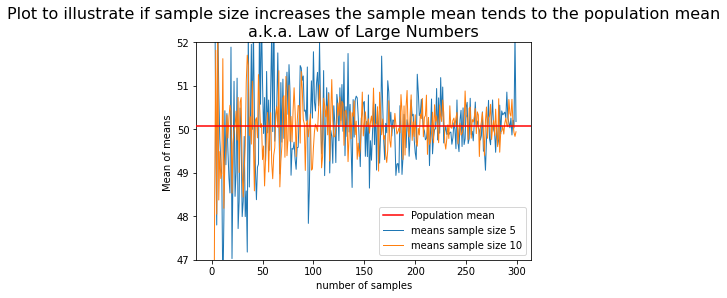

In [268]:
#calculate the mean of means of 1 to 300 samples of size 5
n_samples = list(range(1,301))

means5=[]
means10=[]
for n in n_samples:
    means5.append([pop.sample(5).mean() for _ in range(n)])
    means10.append([pop.sample(10).mean() for _ in range(n)])
meanofmeans5=[]
for m in means5:
    meanofmeans5.append(mean(m))
meanofmeans10=[]
for mm in means10:
    meanofmeans10.append(mean(mm))



     
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12,6))
plt.axhline(pop.mean(), c='r', zorder=10, label = 'Population mean')
# plt.axvline(8289, c='purple', zorder=10, label = f'8289\nsample size 95% +/- 1')
plt.plot(meanofmeans5, label='means sample size 5', lw=1)
plt.plot(meanofmeans10, label='means sample size 10', lw=1)
plt.title("Plot to illustrate if sample size increases the sample mean tends to the population mean\na.k.a. Law of Large Numbers" 
         , fontsize=16)
plt.ylabel('Mean of means ')
plt.xlabel('number of samples')
plt.ylim(47,52)
plt.legend(loc='best')
plt.show()

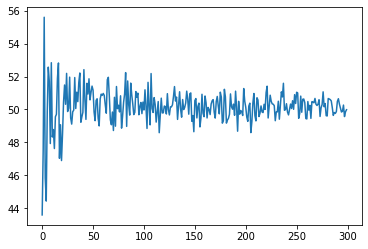

In [177]:
# plt.plot(means, label='mom')
meanofmeans=[]
for m in means:
    meanofmeans.append(mean(m))
plt.plot(meanofmeans)


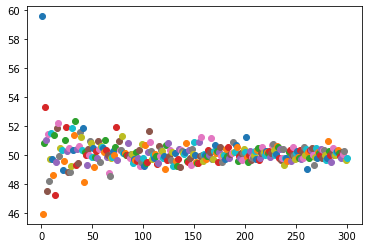

In [181]:
n_samples = list(range(1,301))#[5,10,20,30, 50,100,1000]
n_observations = [5,10,100]

# mean([rolls.sample(5).mean() for _ in n_samples])

means=[]
for n in n_samples:
    means.append([rolls.sample(10).mean() for _ in range(n)])
      
for i,m in enumerate(means):
    plt.scatter(n_samples[i],mean(m))
# for n in n_samples:
#     means = mean([rolls.sample(5).mean() for _ in range(n)])
#     print(f'{n} Samples of {i} has a {means} mean of means')

# plt.plot(means)

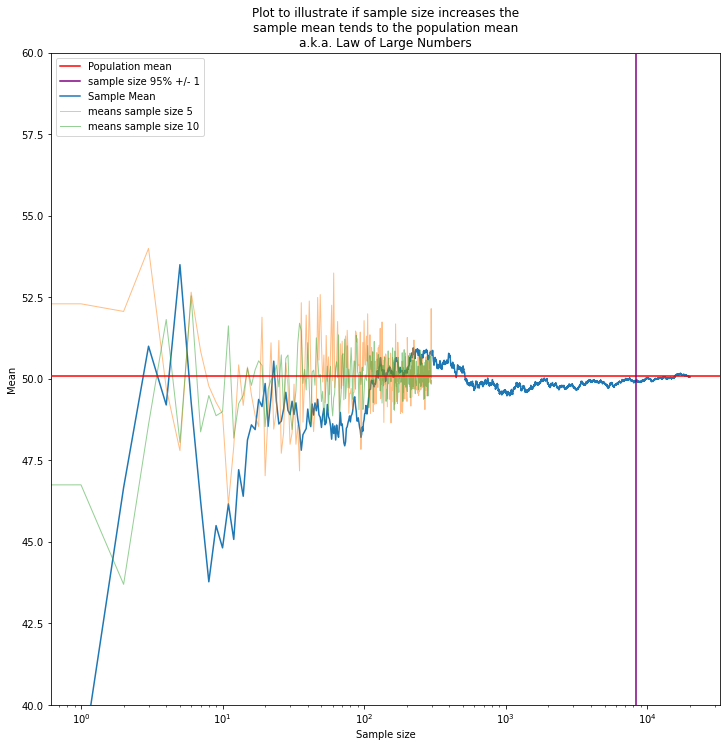

In [270]:
import matplotlib.pyplot as plt
# illustrate in a plot
plt.figure(figsize=(12,12))
plt.axhline(rolls.mean(), c='r', zorder=10, label = 'Population mean')
plt.axvline(8289, c='purple', zorder=10, label = 'sample size 95% +/- 1')
plt.plot(y, label='Sample Mean')
plt.plot(meanofmeans5, label='means sample size 5', lw=1, alpha=.5)
plt.plot(meanofmeans10, label='means sample size 10', lw=1, alpha=.5)
plt.title("Plot to illustrate if sample size increases the\nsample mean tends to the population mean\na.k.a. Law of Large Numbers")
plt.ylabel('Mean')
plt.xlabel('Sample size')
plt.ylim(40,60)
plt.xscale('log')
plt.legend(loc='best')
plt.show()

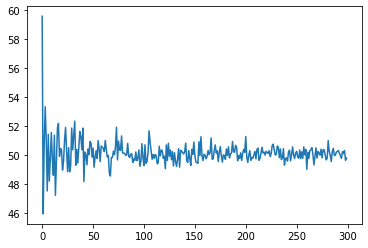

In [182]:
# plt.plot(means, label='mom')
meanofmeans=[]
for m in means:
    meanofmeans.append(mean(m))
plt.plot(meanofmeans)


In [ ]:
alpha=.5

Number of spectators: 1000000
Average age: 4999.620878 years


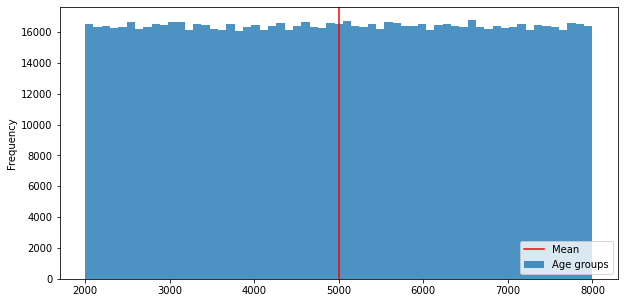

In [272]:
# generate random dice rolls
from numpy.random import seed
from numpy.random import randint
from numpy import mean, std
# seed the random number generator
seed(2019)
# generate a 'population' 
pop = pd.Series(randint(2000, 8000, 1000000))

#Population mean:
print(f'Number of spectators: {len(pop)}')
print(f'Average age: {mean(pop)} years')
pop.plot.hist(bins=61, figsize=(10,5),alpha=0.8, label='Age groups')
# pop.plot(figsize=(10,5));
plt.axvline(mean(pop), c='r', label='Mean')
plt.legend(loc='lower right');


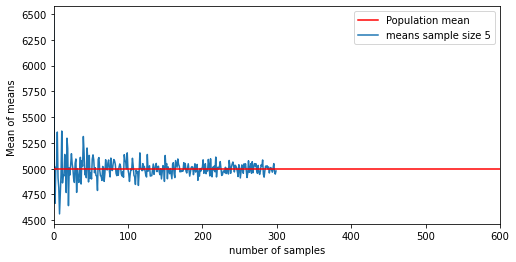

In [290]:
# #calculate the mean of means of 1 to 300 samples of size 5
# n_samples = list(range(1,301))

# means5=[]
# means10=[]
# for n in n_samples:
#     means5.append([pop.sample(5).mean() for _ in range(n)])
# #     means10.append([pop.sample(10).mean() for _ in range(n)])
# meanofmeans5=[]
# for m in means5:
#     meanofmeans5.append(mean(m))
# # meanofmeans10=[]
# # for mm in means10:
# #     meanofmeans10.append(mean(mm))



     
# import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.axhline(pop.mean(), c='r', zorder=10, label = 'Population mean')
# plt.axvline(8289, c='purple', zorder=10, label = f'8289\nsample size 95% +/- 1')
plt.plot(meanofmeans5, label='means sample size 5')
# plt.plot(meanofmeans5)
# plt.plot(meanofmeans10, label='means sample size 10', lw=1)
# plt.title("Plot to illustrate if sample size increases the sample mean tends to the population mean\na.k.a. Law of Large Numbers" 
#          , fontsize=16)
plt.ylabel('Mean of means ')
plt.xlabel('number of samples')
# plt.ylim(4700,5200)
plt.xlim(0, 600)
plt.legend(loc='best')
plt.show()

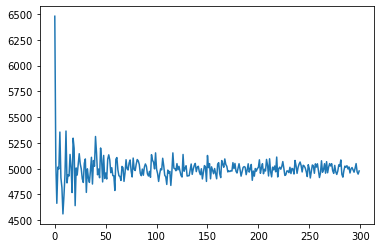

In [281]:
plt.plot(meanofmeans5)